## Day 3 - EDA
### Exploratory data analysis
##### Activity 3

In [12]:
# import all libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read the data into a dataframe
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [41]:
# create dataframes with numerical...
df_num = df[df.select_dtypes(include=[np.number]).columns]
# ...and categorical data only
df_cat = df[df.select_dtypes(include=[object]).columns]

# define numerical column index
num_cols = df_num.columns
# define categorical column index
cat_cols = df_cat.columns

In [5]:
# drop the effective to date column
df_cat = df_cat.drop("effective_to_date", axis=1)

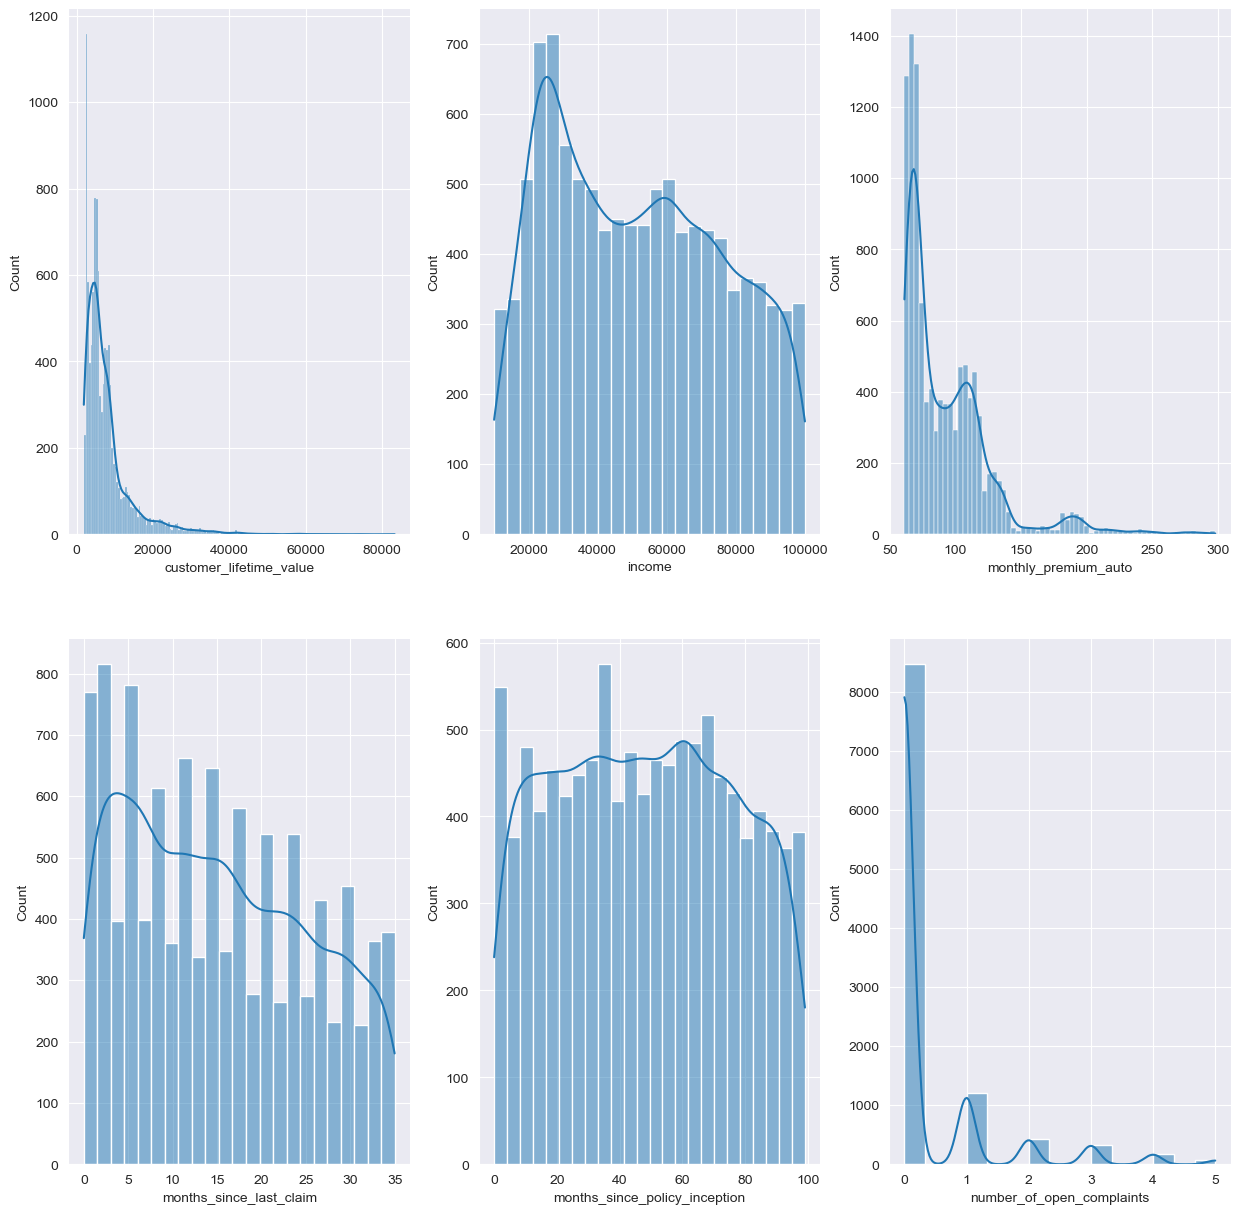

In [5]:
# specifying the number of columns and rows and the size of the plot
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15,15))
# plot histplots of the first six variables of the numerical dataframe with the corresponding column names as x-axes titles
# here, zip is used to create an iterable object with integers in the range from 0 to 6 and the axes for the subplots
for i, ax in zip(range(6), axes.flat):
    _ = sns.histplot(df[num_cols[i]], ax=ax, kde=True)
# apply despine to remove the outer delineators of the graphs on the top and right
sns.despine(top=True, right=True)
# show plot
plt.show()

In [6]:
num_cols.unique()

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies'],
      dtype='object')

In [104]:
cat_cols

Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [8]:
# set the color palette to cubehelix with 6 layers of depth
sns.set_palette("cubehelix", n_colors=6)

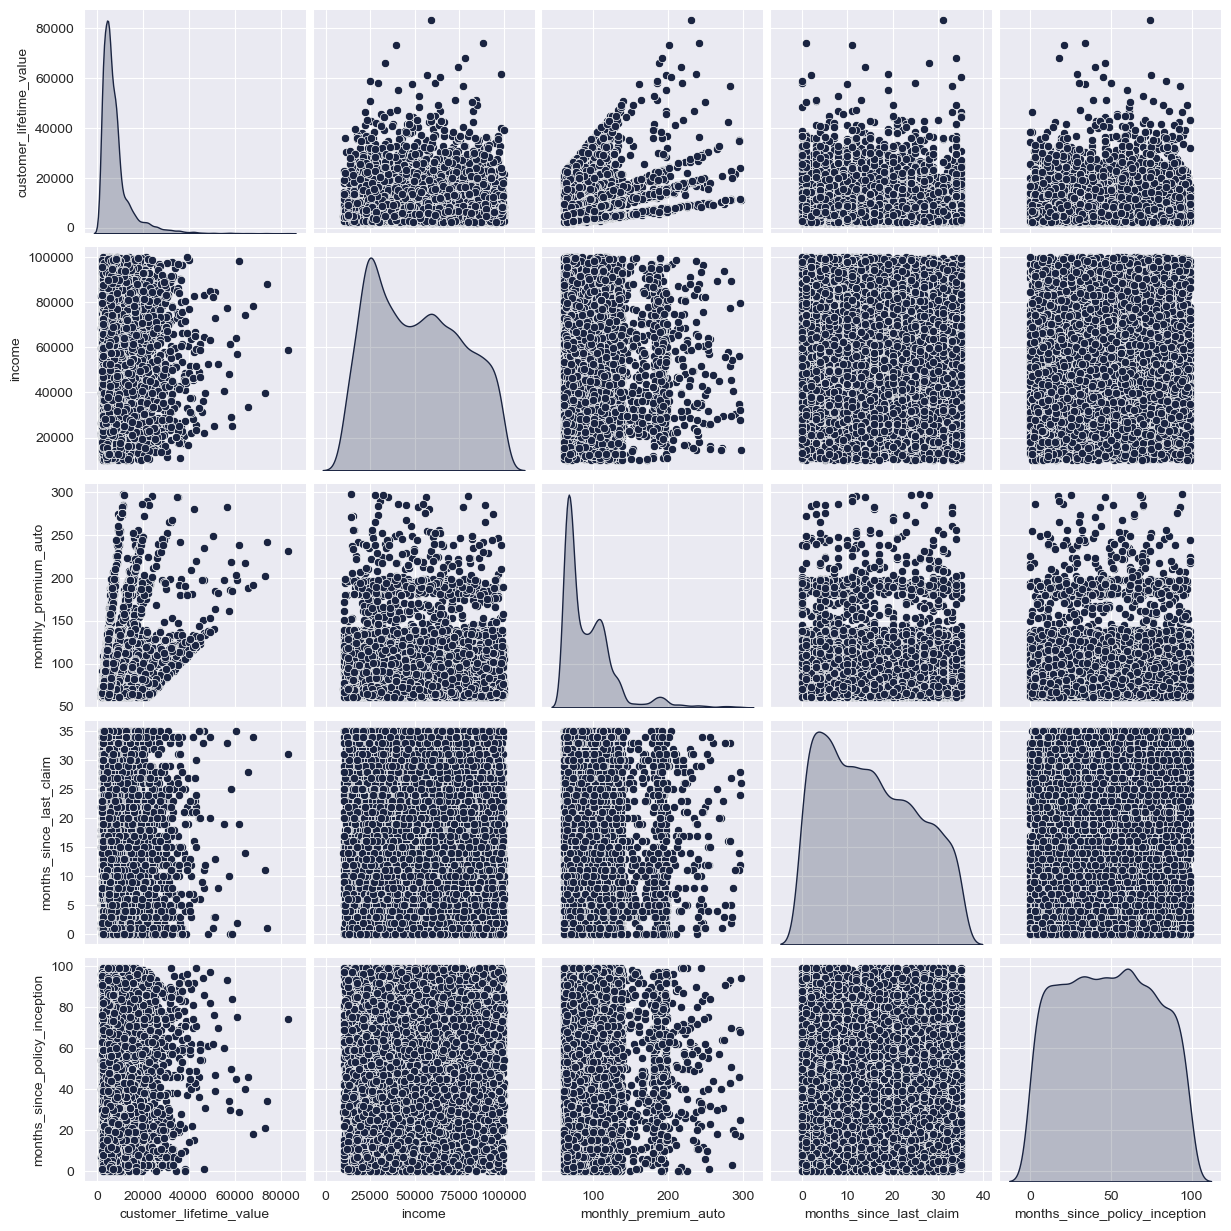

In [9]:
# create a pairplot which plots each variable against all others in pairs of scatterplots
sns.pairplot(df_num[num_cols.drop(["number_of_open_complaints","number_of_policies"])], diag_kind="kde")

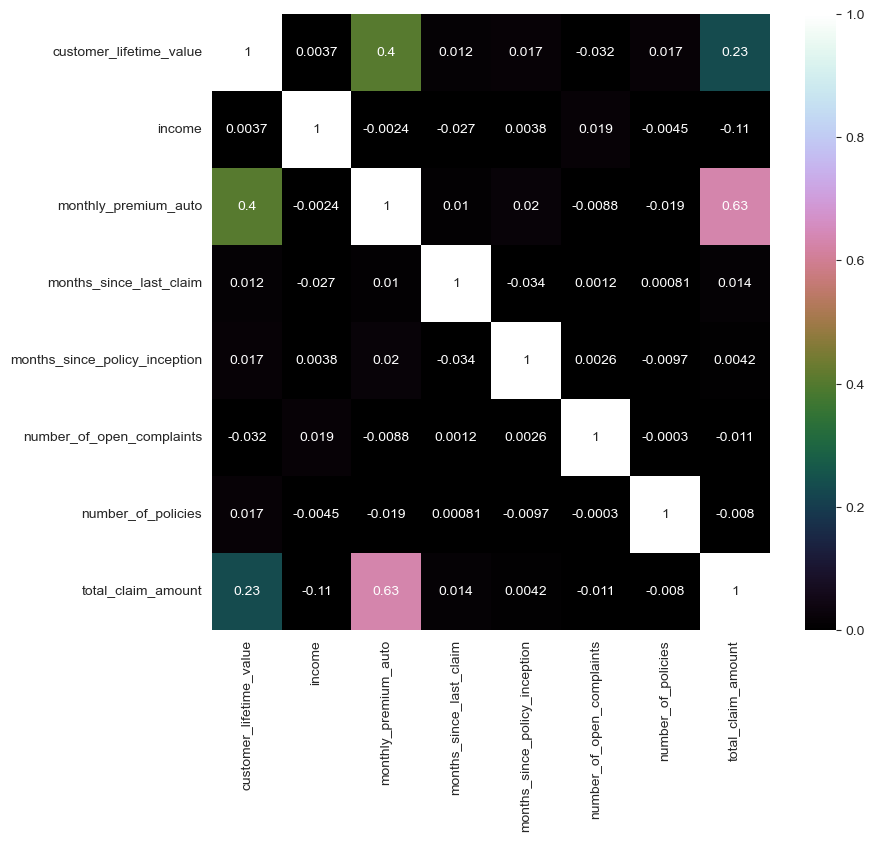

In [42]:
# create a figure with 9 rows by 8 columns
plt.figure(figsize=(9,8))

# calculate correlation matrix (pearson)
corr = df_num[num_cols].corr()

# create heatmap for the correlation matrix
sns.heatmap(corr,vmin=0,vmax=1,annot=True,cmap="cubehelix")

# print the plot
plt.show()

### Activity 4

In [14]:
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


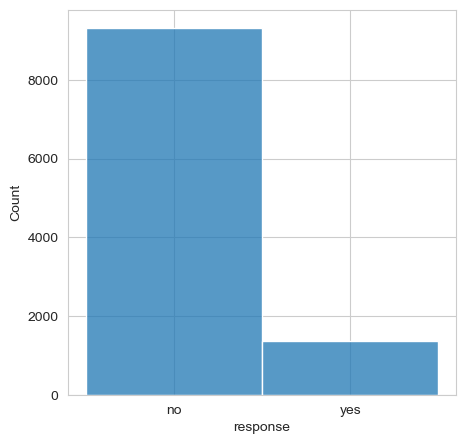

In [10]:
#specifying the size of the plot
fig = plt.subplots(figsize=(5,5))

#plot histplot of the responses, equal to plotting a count of the responses
sns.histplot(data=df_cat,x="response", stat="count")

# print the plot
plt.show()

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

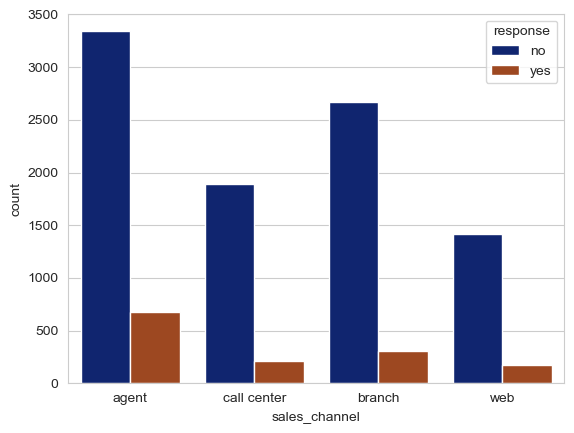

In [37]:
# using countplot to compare sales channels with each other, subcategorizing into the yes/no for response
sns.countplot(data=df_cat, x="sales_channel", hue="response",palette="dark")

# print the plot
plt.show()

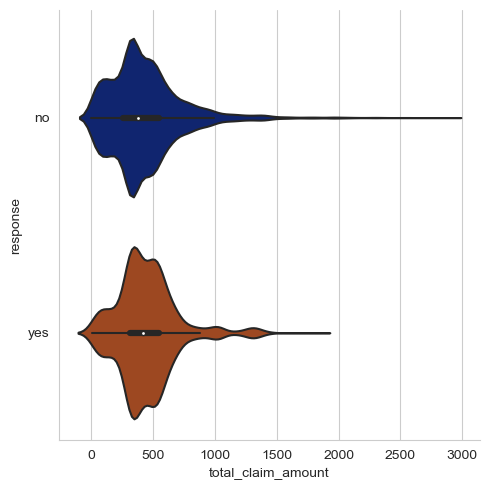

In [11]:
# creating a violin plot showing the distribution of total claim amount depending on the response
sns.catplot(data=df, x="total_claim_amount", y="response",palette="dark", kind="violin")

# print the plot
plt.show()

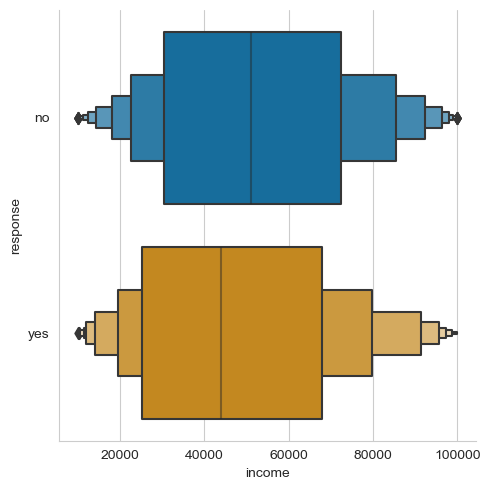

In [16]:
# creating a violin plot showing the distribution of total claim amount depending on the response
sns.catplot(data=df, x="income", y="response", palette="colorblind", kind="boxen")

# print the plot
plt.show()

## Optional

In [113]:
# getting and overview of the data by using describe to see the basic statistics of categorical and numerical dataframes
display(df_cat.describe(),df_num.describe())

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
count,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689
unique,4,2,3,5,59,2,5,2,3,3,3,9,4,4,6,3
top,west region,no,basic,bachelor,1/27/11,jan,employed,f,suburban,married,personal auto,personal l3,offer1,agent,four-door car,medsize
freq,3678,9316,6523,3210,236,5684,6658,5469,6742,6199,7937,4006,4394,4019,5424,7528


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000
mean,8011.906727,51750.243989,93.190196,15.144073,48.100571,0.384975,2.980821,434.227243
std,6877.557889,24778.053035,34.413111,10.086110,27.934300,0.910210,2.399497,292.550878
min,1898.000000,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4014.000000,29335.000000,68.000000,6.000000,24.000000,0.000000,1.000000,269.000000
50%,5776.000000,50398.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.000000
75%,8991.000000,72131.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.000000
max,83325.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.000000


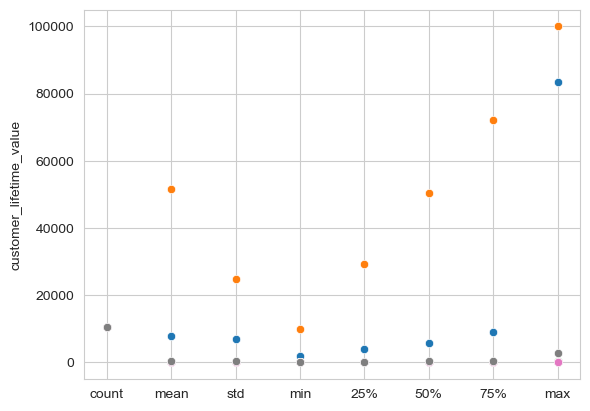

In [118]:
fig = sns.figure(figsize=5,5)

for i, col in enumerate(num_cols):
    np.arange(len(num_cols))
    plt.subplot(i,i)
    _=sns.scatterplot(data=df_num[col].describe())

plt.show()

In [87]:
grouped_data = df_cat.groupby(['education','location_code']).count().reset_index()

In [109]:
df_cat.groupby(['education','location_code']).count().reset_index()

,education,location_code,region,response,coverage,effective_to_date,month,employment_status,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,bachelor,rural,647,647,647,647,647,647,647,647,647,647,647,647,647,647
1,bachelor,suburban,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968
2,bachelor,urban,595,595,595,595,595,595,595,595,595,595,595,595,595,595
3,college,rural,622,622,622,622,622,622,622,622,622,622,622,622,622,622
4,college,suburban,1955,1955,1955,1955,1955,1955,1955,1955,1955,1955,1955,1955,1955,1955
5,college,urban,564,564,564,564,564,564,564,564,564,564,564,564,564,564
6,doctor,rural,112,112,112,112,112,112,112,112,112,112,112,112,112,112
7,doctor,suburban,176,176,176,176,176,176,176,176,176,176,176,176,176,176
8,doctor,urban,101,101,101,101,101,101,101,101,101,101,101,101,101,101
9,high school or below,rural,435,435,435,435,435,435,435,435,435,435,435,435,435,435


In [96]:
grouped_data.value_counts()

education             location_code  region  response  coverage  effective_to_date  month  employment_status  gender  marital_status  policy_type  policy  renew_offer_type  sales_channel  vehicle_class  vehicle_size
bachelor              rural          647     647       647       647                647    647                647     647             647          647     647               647            647            647             1
                      suburban       1968    1968      1968      1968               1968   1968               1968    1968            1968         1968    1968              1968           1968           1968            1
                      urban          595     595       595       595                595    595                595     595             595          595     595               595            595            595             1
college               rural          622     622       622       622                622    622                622     622

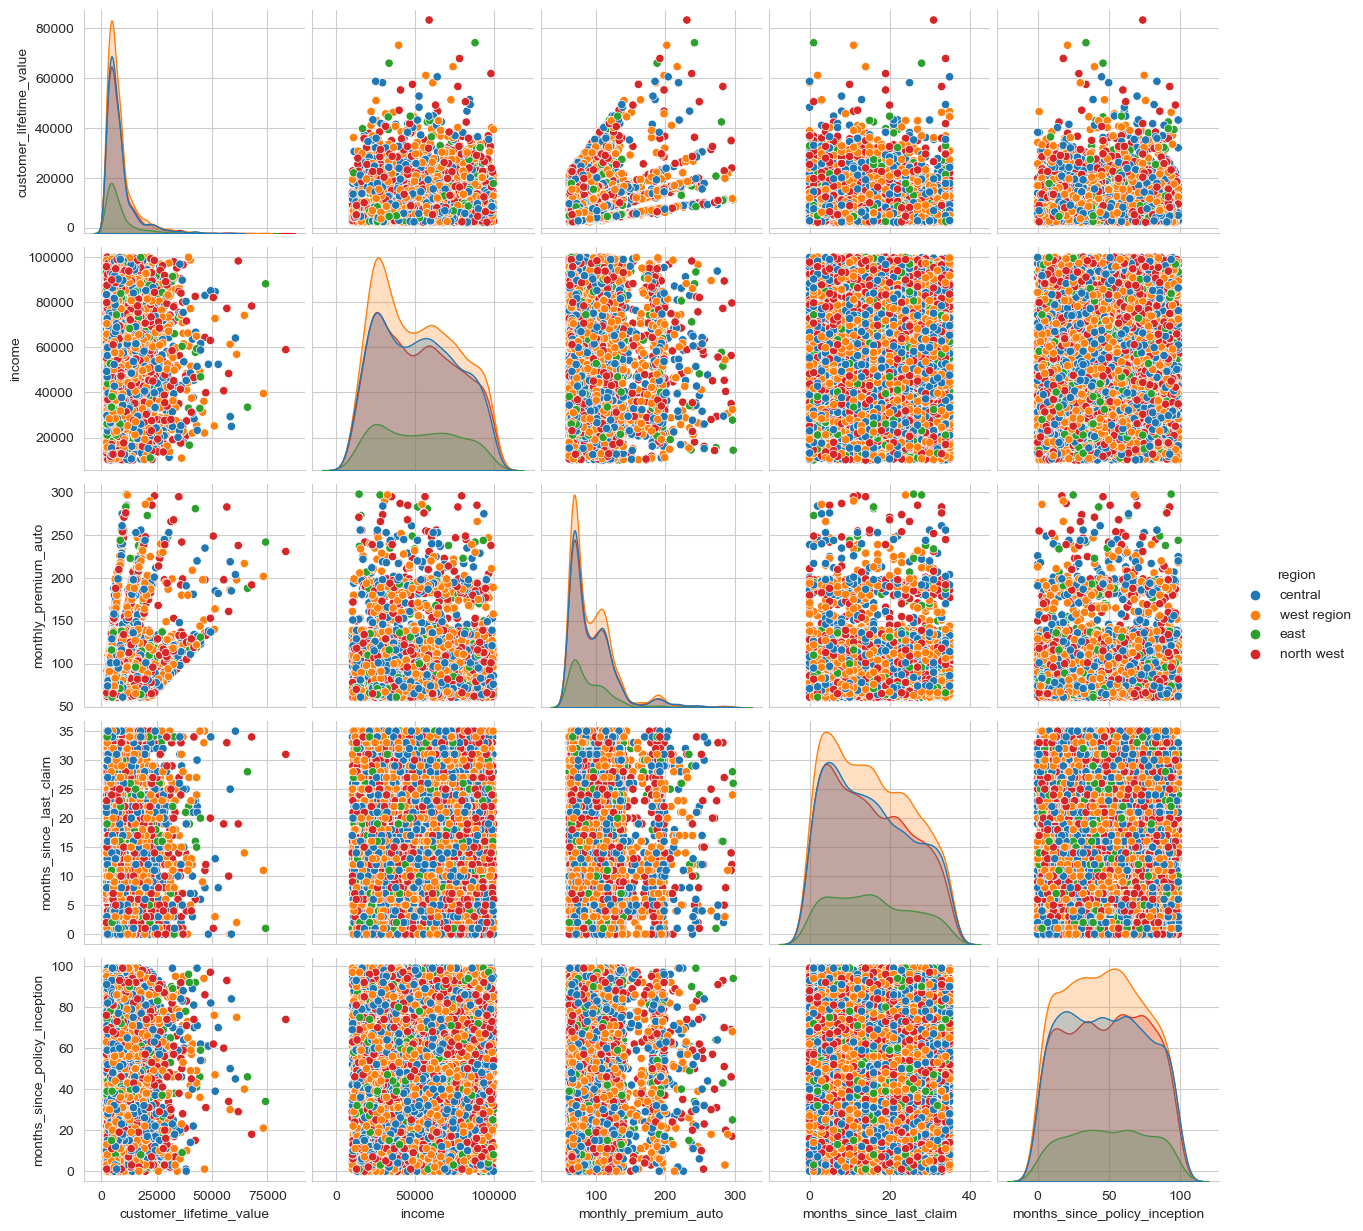

In [6]:
#set seaborn style
sns.set_style("whitegrid")

sns.pairplot(df[df.columns.drop(["number_of_open_complaints", "number_of_policies","total_claim_amount"])], diag_kind="kde", hue="region")

# show plot
plt.show()